# Code to train a model to predict values of sin(x)

In [12]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

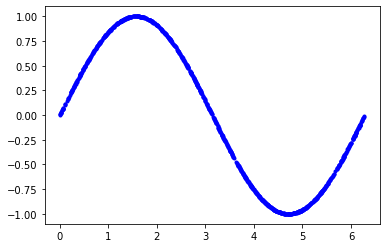

In [3]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

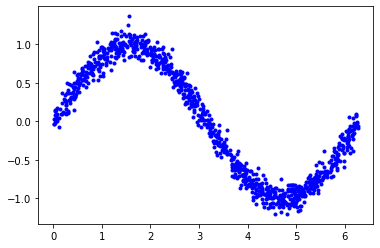

In [4]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

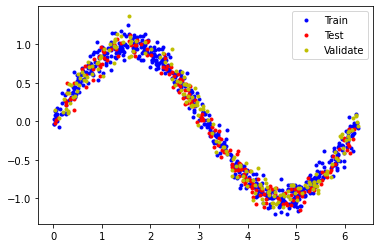

In [5]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

In [6]:
# We'll use Keras to create a simple model architecture
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))
model.add(keras.layers.Dense(16, activation='tanh'))
# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
#Train the model on our training data while validating on our validation set
history_1 = model.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/500
10/10 [==============================] - 2s 39ms/step - loss: 0.7744 - mae: 0.7797 - val_loss: 0.5428 - val_mae: 0.6604
Epoch 2/500
10/10 [==============================] - 0s 9ms/step - loss: 0.5631 - mae: 0.6642 - val_loss: 0.4663 - val_mae: 0.5979
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 0.5135 - mae: 0.6194 - val_loss: 0.4153 - val_mae: 0.5678
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4514 - mae: 0.5911 - val_loss: 0.3802 - val_mae: 0.5438
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4073 - mae: 0.5651 - val_loss: 0.3417 - val_mae: 0.5161
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 0.3645 - mae: 0.5319 - val_loss: 0.3048 - val_mae: 0.4885
Epoch 7/500
10/10 [==============================] - 0s 13ms/step - loss: 0.3273 - mae: 0.5023 - val_loss: 0.2733 - val_mae: 0.4627
Epoch 8/500
10/10 [==============================] - 0s 14ms/step - loss: 0.2932 

7/7 [==============================] - 0s 2ms/step - loss: 0.0087 - mae: 0.0763


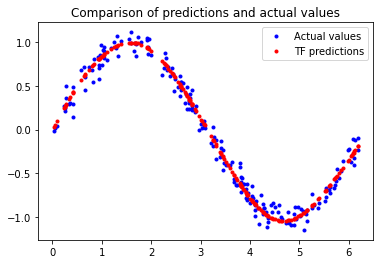

In [8]:

# Calculate and print the loss on our test dataset
test_loss, test_mae = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

# Code to train a simple XOR model
### (More suitable to test on boards with less memory)

In [14]:
MODEL = keras.Sequential()
MODEL.add(keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)))
MODEL.add(keras.layers.Dense(2, activation='sigmoid'))
# Final layer is a single neuron, since we want to output a single value
MODEL.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
MODEL.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='mse')

In [17]:
training_data = np.array([[0, 0],[1, 0],[0, 1],[1, 1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

MODEL.fit(training_data, target_data, epochs=1000)

print(MODEL.predict(training_data).round())

Epoch 1/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1657
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1656
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1656
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1656
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1656
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1655
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1655
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1655
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1655
Epoch 10/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1654
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1654
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1654
Epoch 13/1000
1/1 [==========================

# Exporting the model for arduino

In [20]:
def weights_to_cpp(model, filename="weights_and_biases.txt"):
    model.summary()
    weights = []
    biases = []
    for l in range(len(model.layers)):
        W, B = model.layers[l].get_weights()
        weights.append(W.flatten())
        biases.append(B.flatten())
    
    z = []
    b = []
    for i in np.array(weights):
        for l in i:
            z.append(l)
    for i in np.array(biases):
        for l in i:
            b.append(l)
    with open(filename, "w") as f:
      f.write("weights: {")
      for i in range(len(z)):
        if (i < len(z)-1):
          f.write(str(z[i])+", ")
        else:
          f.write(str(z[i]))
      f.write("}\n\n")

      f.write("biases: {")
      for i in range(len(b)):
        if (i < len(b)-1):
          f.write(str(b[i])+", ")
        else:
          f.write(str(b[i]))
      f.write("}\n\n")

    print("Weights: ", z)
    print("Biases: ", b)

weights_to_cpp(MODEL, "xor.txt")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Weights:  [6.5388827, 2.3116155, 6.5393276, 2.311627, -2.8204367, -2.5849876, 3.4741454, -1.7074409, -2.5904362, -0.8814233]
Biases:  [-1.4674287, -3.13011, 0.36903697, -0.27291444, 1.5541532]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app
